# Proyecto: Ataques de Tiburones

## Importación de datos y librerías

In [212]:
#importamos librerias 

%pip install ipython
%pip install seaborn

import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np

import warnings
warnings.filterwarnings("ignore")

#para ilustrar
import pylab as plt
import seaborn as sns

# para que se vea el gráfico
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [213]:
# cargar los datos

path = r"C:\Users\GAMM\Documents\BootCamp\Proyecto\Ataques_de_Tiburones\Data\attacks.csv"

tiburones_ori = pd.read_csv(path, encoding='ISO-8859-1')

tiburones = tiburones_ori.copy()

#un primer vistazo a la data

tiburones.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [214]:
#echamos un vistazo de los datos

tiburones.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# Análisis inicial

In [215]:
#veamos las columnas

tiburones.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [216]:
#comenzaremos por unificar el formato de los nombres de columnas para poder trabajar mejor

tiburones.columns = tiburones.columns.str.replace(" ", "_").str.lower()

In [217]:
#hay algunos nombres de columnas que tienen un espacio al final y algunos con puntos, se lo vamos a quitar para que queden todos listos para trabajar

tiburones.columns = tiburones.columns.str.replace(" ", "").str.replace(".","_")

In [218]:
#revisamos

tiburones.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [219]:
# Eliminaremos el guion bajo al final del nombre de la columna
tiburones.columns = [col.rstrip('_') if col.endswith('_') else col for col in tiburones.columns]

In [220]:
#revisamos

tiburones.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [221]:
#Ahora veamos lo que son objetos

tiburones.describe(include="object")


,case_number,date,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,unnamed:_22,unnamed:_23
count,8702,6302,6298,6252,5847,5762,5758,6092,5737,3471,6274,5763,2948,3464,6285,6302,6301,6302,6302,6302,1,2
unique,6287,5433,8,212,825,4108,1532,5230,6,157,3737,8,366,1549,4969,6291,6290,6285,6285,6286,1,2
top,0,1957,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,FATAL,N,Afternoon,White shark,"C. Moore, GSAF",1923.00.00.a-NJ fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.00.00.b,1920.00.00.b,stopped here,Teramo
freq,2400,11,4595,2229,1037,163,971,550,5094,154,802,4293,187,163,105,2,2,4,2,2,1,1


In [222]:
#esto demuestra que hay datos numéricos mezclados con objetos, porque se elige el más general

tiburones._get_numeric_data().shape

(25723, 2)

In [223]:
#y ahora lo que son números, donde vemos que una es fecha y el otro hay que investigar

tiburones.describe(exclude="object")

,year,original_order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


## Valores nulos

In [224]:
#Importaremos una función para visulizar datos nulos y tener una visión general

def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña el % de valores nulos y lo grafica"""
    
    nan_cols = df.isna().mean() * 100  # porcentaje de nulo en cada columna
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))     # inicia la figura y establece el tamaño
    sns.heatmap(df.isna(),          # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',     # mapa de color
                cbar=False,         # sin barra lateral
               )


    plt.show();

'N nan cols: 24'

case_number               66.170353
date                      75.500525
year                      75.508300
type                      75.516075
country                   75.694903
area                      77.269370
location                  77.599813
activity                  77.615364
name                      76.316915
sex                       77.697003
age                       86.506240
injury                    75.609377
fatal_(y/n)               77.595926
time                      88.539439
species                   86.533453
investigator_or_source    75.566614
pdf                       75.500525
href_formula              75.504412
href                      75.500525
case_number_1             75.500525
case_number_2             75.500525
original_order            75.473312
unnamed:_22               99.996112
unnamed:_23               99.992225
dtype: float64

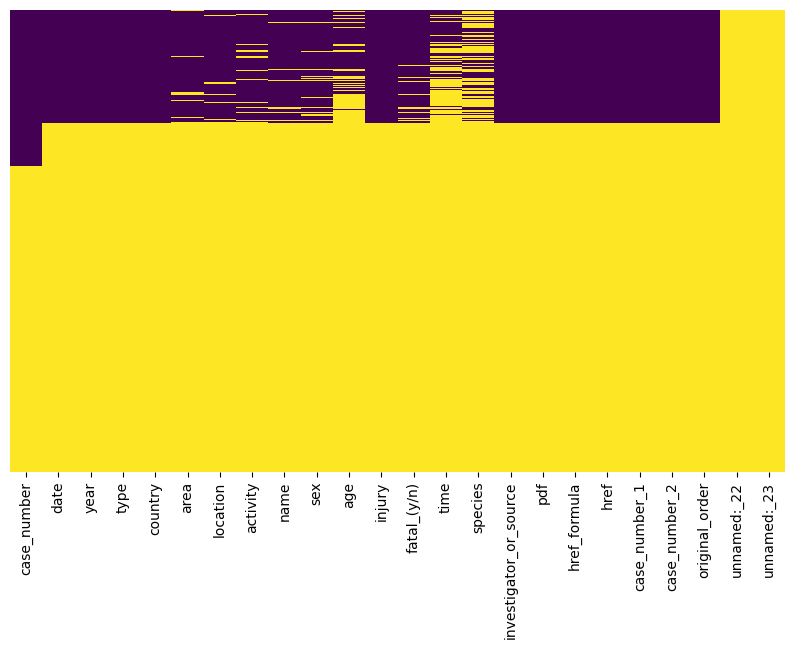

In [225]:
#ahora echamos un vistazo

check_nan(tiburones)

In [226]:
#revisemos bien estos datos nulos de las columnas

col_nulos = tiburones.isna().sum()

col_nulos[col_nulos>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
unnamed:_22               25722
unnamed:_23               25721
dtype: int64

In [227]:
tiburones.shape

(25723, 24)

In [228]:
#teniendo en cuenta que la mayoría de columnas tienen más de un 60% de datos nulos, podemos eliminar filas poniendo una condición

umbral = len(tiburones.columns) * 0.5 #definimos un umbral del 50%
tiburones.dropna(thresh=umbral, inplace=True) # eliminamos filas con valores nulos por debajo del umbral

'N nan cols: 18'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex                        8.965408
age                       44.922247
injury                     0.444303
fatal_(y/n)                8.552840
time                      53.221200
species                   45.033323
investigator_or_source     0.269756
href_formula               0.015868
unnamed:_22               99.984132
unnamed:_23               99.968264
dtype: float64

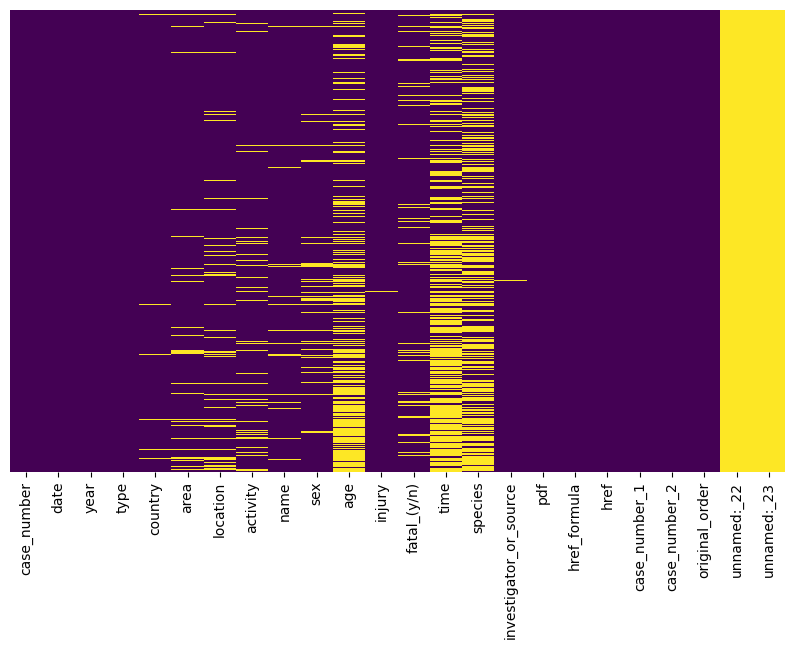

In [229]:
#Ahora veamos cómo está el df
check_nan(tiburones)

In [230]:
#vamos a obervar una muestra aleatoria para ver los datos

muestra = tiburones.sample(n=5, random_state=42) # seleccionar 10 filas aleatorias
muestra # imprimir la muestra aleatoria

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
1893,2001.11.07,07-Nov-2001,2001.0,Invalid,AUSTRALIA,Western Australia,"Leighton Beach, south of North Cottesloe",Surf-skiing,male,M,NaN,"No injury, fell off ski after possibly collidi...",NaN,NaN,NaN,"T. Peake, GSAF",2001.11.07-LeightonBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.07,2001.11.07,4410.0,NaN,NaN
351,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Florida,"Pepper Park Beach, St. Lucie County",Body boarding,male,M,22,2 lacerations to ankle,N,13h00,NaN,"WPBF.com, 10/6/2015",2015.10.05.b-FtPierce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.05.b,2015.10.05.b,5952.0,NaN,NaN
1498,2006.02.27,27-Feb-2006,2006.0,Unprovoked,USA,Hawaii,"Makena, Maui",Standing,Nikky Raleigh,F,15,Deep laceration to right calf,N,16h30,5' to 7' shark,"G.T. Kubota, Star Bulletin, 2/28/2006",2006.02.27-Raleigh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.02.27,2006.02.27,4805.0,NaN,NaN
5808,1881.08.16.R,Reported 16-Aug-1881,1881.0,Unprovoked,NaN,Western Banks,NaN,"Floating, holding onto an oar after dory capsized",George Sedgwick,M,20,FATAL,Y,NaN,NaN,"Lewiston Evening Journal, 8/16/1881",1881.08.16.R-Sedgwick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1881.08.16.R,1881.08.16.R,495.0,NaN,NaN
599,2013.11.23.a,23-Nov-2013,2013.0,Unprovoked,AUSTRALIA,Western Australia,Gracetown,Surfing,Chris Boyd,M,35,FATAL,Y,09h00,Thought to involve a white shark,"J. Baily; Perth Now, 11/23/2013",2013.11.23.a-Boyd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.11.23.a,2013.11.23.a,5704.0,NaN,NaN


In [231]:
#podemos observar que las columnas unnamed:_22	unnamed:_23 está llena de NaN, así que sutituiremos con "unknown"
tiburones["unnamed:_22"] = tiburones["unnamed:_22"].fillna("unknown")
tiburones["unnamed:_23"] = tiburones["unnamed:_23"].fillna("unknown")

#haremos lo mismo con la columna age
tiburones["age"] = tiburones["age"].fillna("unknown")

'N nan cols: 15'

case_number                0.015868
year                       0.031736
type                       0.063472
country                    0.793399
area                       7.219930
location                   8.568708
activity                   8.632180
name                       3.332275
sex                        8.965408
injury                     0.444303
fatal_(y/n)                8.552840
time                      53.221200
species                   45.033323
investigator_or_source     0.269756
href_formula               0.015868
dtype: float64

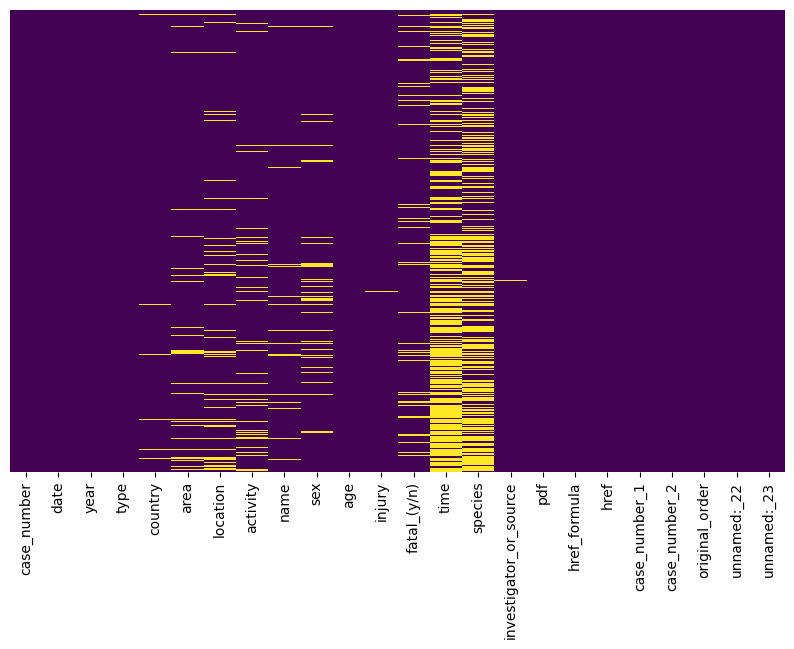

In [232]:
#visualizamos
check_nan(tiburones)

In [233]:
#ahora vamos a ver la columna time y la de species para ver qué podemos hacer

tiburones["species"].isna()

0       False
1        True
2        True
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: species, Length: 6302, dtype: bool

In [234]:
tiburones["time"].isna()

0       False
1       False
2       False
3        True
4        True
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: time, Length: 6302, dtype: bool

In [235]:
#veamos los tipos de datos para ver con qué podemos sutituirlas
tiburones["time"].head()

0            18h00
1    14h00  -15h00
2            07h45
3              NaN
4              NaN
Name: time, dtype: object

In [236]:
tiburones["species"].head()

0        White shark
1                NaN
2                NaN
3          2 m shark
4    Tiger shark, 3m
Name: species, dtype: object

In [237]:
#son objetos, así que sutituimos en species por "unknown", para simplificar porque el porcentaje de valores nulos es > 50% así que no se puede sacar conclusiones
tiburones["species"] = tiburones["species"].fillna("unknown")
tiburones["time"] = tiburones["time"].fillna("unknown")


'N nan cols: 13'

case_number               0.015868
year                      0.031736
type                      0.063472
country                   0.793399
area                      7.219930
location                  8.568708
activity                  8.632180
name                      3.332275
sex                       8.965408
injury                    0.444303
fatal_(y/n)               8.552840
investigator_or_source    0.269756
href_formula              0.015868
dtype: float64

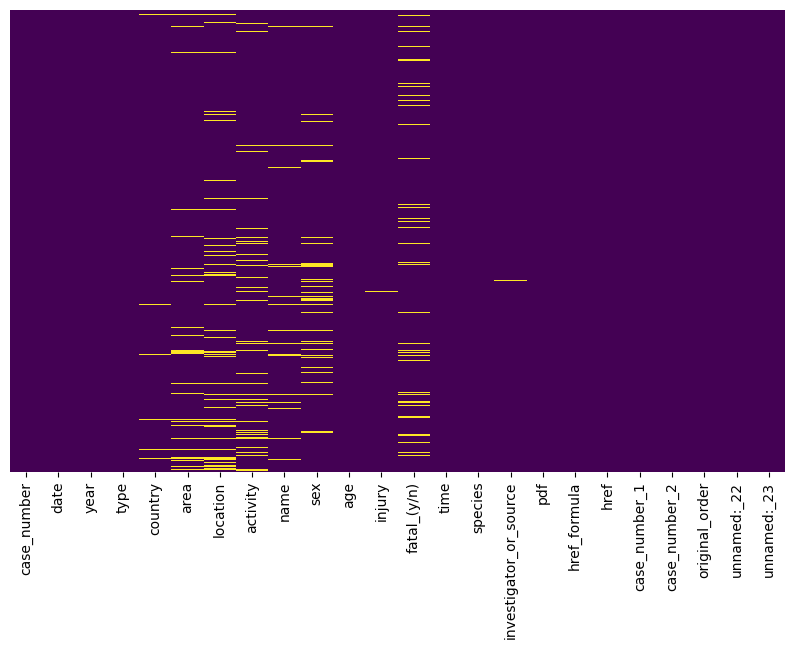

In [238]:
#Volvermos a revisar

check_nan(tiburones)

In [239]:
#vamos a obervar una muestra aleatoria para ver los datos

muestra = tiburones.sample(n=10, random_state=42) # seleccionar 10 filas aleatorias
muestra # imprimir la muestra aleatoria

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
1893,2001.11.07,07-Nov-2001,2001.0,Invalid,AUSTRALIA,Western Australia,"Leighton Beach, south of North Cottesloe",Surf-skiing,male,M,unknown,"No injury, fell off ski after possibly collidi...",NaN,unknown,unknown,"T. Peake, GSAF",2001.11.07-LeightonBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.07,2001.11.07,4410.0,unknown,unknown
351,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Florida,"Pepper Park Beach, St. Lucie County",Body boarding,male,M,22,2 lacerations to ankle,N,13h00,unknown,"WPBF.com, 10/6/2015",2015.10.05.b-FtPierce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.05.b,2015.10.05.b,5952.0,unknown,unknown
1498,2006.02.27,27-Feb-2006,2006.0,Unprovoked,USA,Hawaii,"Makena, Maui",Standing,Nikky Raleigh,F,15,Deep laceration to right calf,N,16h30,5' to 7' shark,"G.T. Kubota, Star Bulletin, 2/28/2006",2006.02.27-Raleigh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.02.27,2006.02.27,4805.0,unknown,unknown
5808,1881.08.16.R,Reported 16-Aug-1881,1881.0,Unprovoked,NaN,Western Banks,NaN,"Floating, holding onto an oar after dory capsized",George Sedgwick,M,20,FATAL,Y,unknown,unknown,"Lewiston Evening Journal, 8/16/1881",1881.08.16.R-Sedgwick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1881.08.16.R,1881.08.16.R,495.0,unknown,unknown
599,2013.11.23.a,23-Nov-2013,2013.0,Unprovoked,AUSTRALIA,Western Australia,Gracetown,Surfing,Chris Boyd,M,35,FATAL,Y,09h00,Thought to involve a white shark,"J. Baily; Perth Now, 11/23/2013",2013.11.23.a-Boyd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.11.23.a,2013.11.23.a,5704.0,unknown,unknown
3950,1960.11.00.d,Nov-1960,1960.0,Boat,SOUTH AFRICA,Western Cape Province,"5 km from Gordons Bay, False Bay",Hand lining for shad,"7.5 m boat, occupants: 8 men",NaN,unknown,"No injury to occupants, shark bit 45 cm hole i...",N,unknown,White shark (tooth fragments recovered from hu...,"D. Davies; T. Wallett, p.27-30",1960.11.00.d-GordonsBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.11.00.d,1960.11.00.d,2353.0,unknown,unknown
1038,2010.02.15,15-Feb-2010,2010.0,Unprovoked,FIJI,Off Vanua Levu,Nara Reef,Scuba diving,Henry Usimewa,M,19,FATAL,Y,09h30,unknown,"Fiji Times, 2/17/2010",2010.02.15-Usimewa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.02.15,2010.02.15,5265.0,unknown,unknown
3113,1978.09.27,27-Sep-1978,1978.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Miller's Point, False Bay",Spearfishing,Erik Lombard,M,27,"No injury, shark took his catch, then towed & ...",N,16h00,"White shark, 3.7 m [12']","E. Lombard, M. Levine, GSAF",1978.09.27-Lombard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.09.27,1978.09.27,3190.0,unknown,unknown
5938,1864.10.02,02-Oct-1864,1864.0,Sea Disaster,USA,North Carolina,"Cedar Island, Carteret County",Wreck of the Aphrodite,males x 5,M,unknown,FATAL,Y,unknown,unknown,National Republican 10/11/1864,1864.10.02-Aphrodite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.10.02,1864.10.02,365.0,unknown,unknown
4588,1947.01.05,05-Jan-1947,1947.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,Peter C. Knoop,M,18,Flexed left leg lacerated,N,15h50,>1.6 m shark,"P. Knoop, M. Levine, GSAF",1947.01.05-Knoop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfil

In [240]:
#para la columna fatal sustituiremos los valores nulos por U de "unknown" y le agregaremos esa tercer opcion al nombre de la columna

tiburones["fatal_(y/n)"] = tiburones["fatal_(y/n)"].fillna("U")



In [241]:
tiburones.rename(columns={"fatal_(y/n)": "fatal_(y/n/u)"}, inplace=True)


'N nan cols: 12'

case_number               0.015868
year                      0.031736
type                      0.063472
country                   0.793399
area                      7.219930
location                  8.568708
activity                  8.632180
name                      3.332275
sex                       8.965408
injury                    0.444303
investigator_or_source    0.269756
href_formula              0.015868
dtype: float64

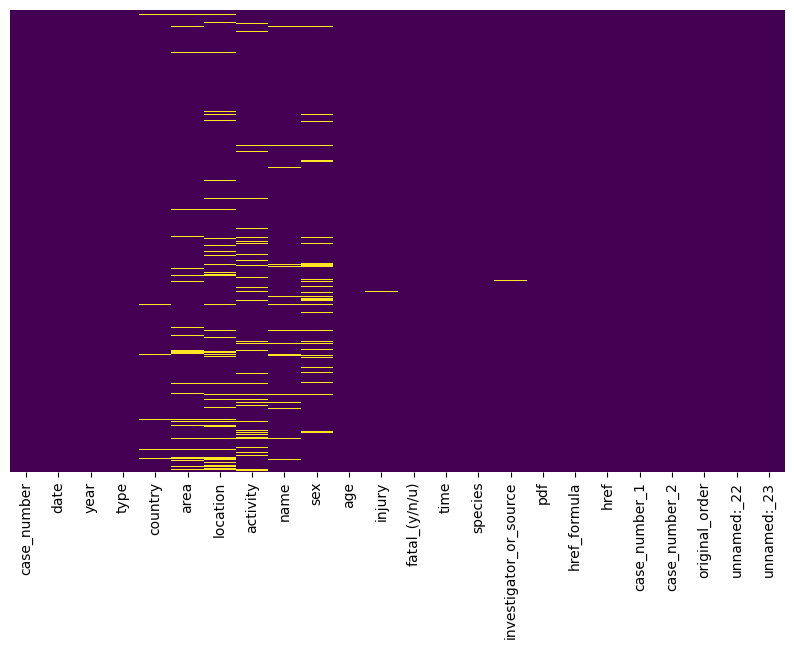

In [242]:
#volvemos a chequear 

check_nan(tiburones)

In [243]:
#ahora las columnas de location, activity y sex que son las siguientes con mayor porcentaje de nulos

tiburones.loc[:, ['location', 'activity', 'sex']]


,location,activity,sex
0,"Oceanside, San Diego County",Paddling,F
1,"St. Simon Island, Glynn County",Standing,F
2,"Habush, Oahu",Surfing,M
3,Arrawarra Headland,Surfing,M
4,La Ticla,Free diving,M
...,...,...,...
6297,Roebuck Bay,Diving,M
6298,NaN,Pearl diving,M
6299,Ocracoke Inlet,Swimming,M
6300,"Panama Bay 8ºN, 79ºW",NaN,M


In [244]:
#repetiremos el proceso y colocaremos en los valores nulos unknown

tiburones["location"] = tiburones["location"].fillna("unknown")
tiburones["activity"] = tiburones["activity"].fillna("unknown")
tiburones["sex"] = tiburones["sex"].fillna("unknown")

'N nan cols: 9'

case_number               0.015868
year                      0.031736
type                      0.063472
country                   0.793399
area                      7.219930
name                      3.332275
injury                    0.444303
investigator_or_source    0.269756
href_formula              0.015868
dtype: float64

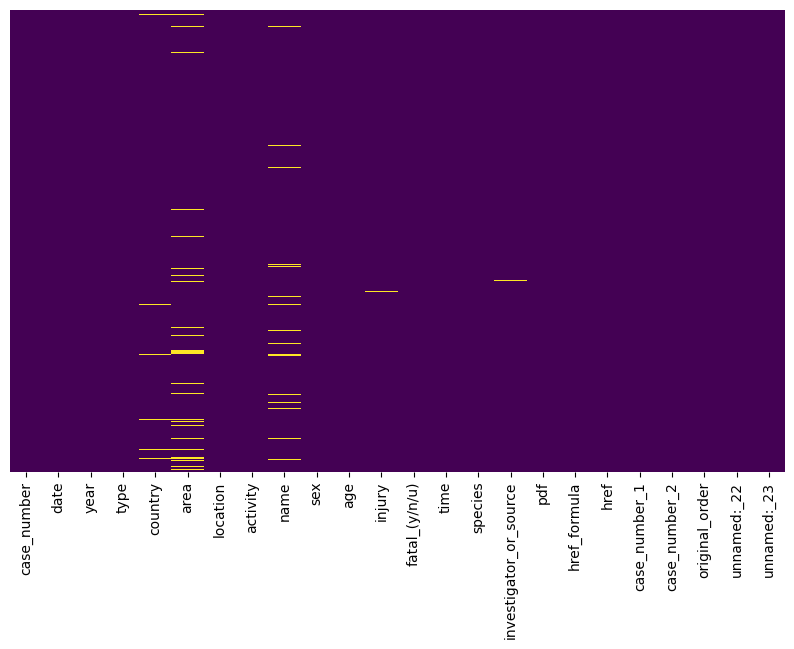

In [245]:
#volvemos a chequear 
check_nan(tiburones)

In [246]:
#ahora area y name que son las que más tienen de las restantes
tiburones.loc[:, ['area', 'name']]

,area,name
0,California,Julie Wolfe
1,Georgia,Adyson McNeely
2,Hawaii,John Denges
3,New South Wales,male
4,Colima,Gustavo Ramos
...,...,...
6297,Western Australia,male
6298,Western Australia,Ahmun
6299,North Carolina,Coast Guard personnel
6300,NaN,Jules Patterson


In [247]:
#repetiremos el proceso 
tiburones["area"] = tiburones["area"].fillna("unknown")
tiburones["name"] = tiburones["name"].fillna("unknown")

'N nan cols: 7'

case_number               0.015868
year                      0.031736
type                      0.063472
country                   0.793399
injury                    0.444303
investigator_or_source    0.269756
href_formula              0.015868
dtype: float64

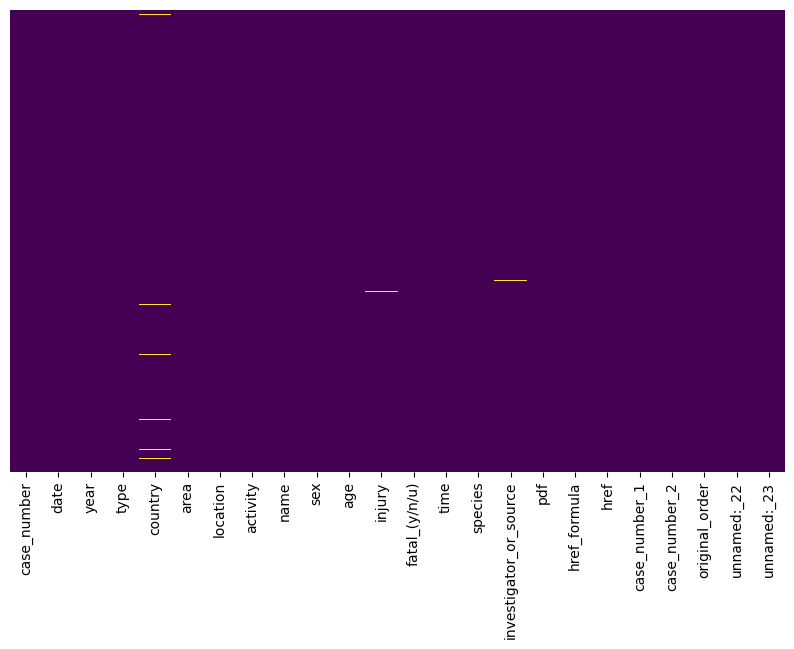

In [248]:
check_nan(tiburones)

In [249]:
#vamos a obervar una muestra aleatoria para ver los datos
muestra

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
1893,2001.11.07,07-Nov-2001,2001.0,Invalid,AUSTRALIA,Western Australia,"Leighton Beach, south of North Cottesloe",Surf-skiing,male,M,unknown,"No injury, fell off ski after possibly collidi...",NaN,unknown,unknown,"T. Peake, GSAF",2001.11.07-LeightonBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.07,2001.11.07,4410.0,unknown,unknown
351,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Florida,"Pepper Park Beach, St. Lucie County",Body boarding,male,M,22,2 lacerations to ankle,N,13h00,unknown,"WPBF.com, 10/6/2015",2015.10.05.b-FtPierce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.05.b,2015.10.05.b,5952.0,unknown,unknown
1498,2006.02.27,27-Feb-2006,2006.0,Unprovoked,USA,Hawaii,"Makena, Maui",Standing,Nikky Raleigh,F,15,Deep laceration to right calf,N,16h30,5' to 7' shark,"G.T. Kubota, Star Bulletin, 2/28/2006",2006.02.27-Raleigh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.02.27,2006.02.27,4805.0,unknown,unknown
5808,1881.08.16.R,Reported 16-Aug-1881,1881.0,Unprovoked,NaN,Western Banks,NaN,"Floating, holding onto an oar after dory capsized",George Sedgwick,M,20,FATAL,Y,unknown,unknown,"Lewiston Evening Journal, 8/16/1881",1881.08.16.R-Sedgwick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1881.08.16.R,1881.08.16.R,495.0,unknown,unknown
599,2013.11.23.a,23-Nov-2013,2013.0,Unprovoked,AUSTRALIA,Western Australia,Gracetown,Surfing,Chris Boyd,M,35,FATAL,Y,09h00,Thought to involve a white shark,"J. Baily; Perth Now, 11/23/2013",2013.11.23.a-Boyd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.11.23.a,2013.11.23.a,5704.0,unknown,unknown
3950,1960.11.00.d,Nov-1960,1960.0,Boat,SOUTH AFRICA,Western Cape Province,"5 km from Gordons Bay, False Bay",Hand lining for shad,"7.5 m boat, occupants: 8 men",NaN,unknown,"No injury to occupants, shark bit 45 cm hole i...",N,unknown,White shark (tooth fragments recovered from hu...,"D. Davies; T. Wallett, p.27-30",1960.11.00.d-GordonsBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.11.00.d,1960.11.00.d,2353.0,unknown,unknown
1038,2010.02.15,15-Feb-2010,2010.0,Unprovoked,FIJI,Off Vanua Levu,Nara Reef,Scuba diving,Henry Usimewa,M,19,FATAL,Y,09h30,unknown,"Fiji Times, 2/17/2010",2010.02.15-Usimewa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.02.15,2010.02.15,5265.0,unknown,unknown
3113,1978.09.27,27-Sep-1978,1978.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Miller's Point, False Bay",Spearfishing,Erik Lombard,M,27,"No injury, shark took his catch, then towed & ...",N,16h00,"White shark, 3.7 m [12']","E. Lombard, M. Levine, GSAF",1978.09.27-Lombard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.09.27,1978.09.27,3190.0,unknown,unknown
5938,1864.10.02,02-Oct-1864,1864.0,Sea Disaster,USA,North Carolina,"Cedar Island, Carteret County",Wreck of the Aphrodite,males x 5,M,unknown,FATAL,Y,unknown,unknown,National Republican 10/11/1864,1864.10.02-Aphrodite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.10.02,1864.10.02,365.0,unknown,unknown
4588,1947.01.05,05-Jan-1947,1947.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,Peter C. Knoop,M,18,Flexed left leg lacerated,N,15h50,>1.6 m shark,"P. Knoop, M. Levine, GSAF",1947.01.05-Knoop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfil

In [250]:
"""             
investigando el caso 5808	1881.08.16.R	Reported 16-Aug-1881	1881.0	Unprovoked	NaN	Western Banks y 
no se puede identificar el sitio así que repetimos proceso, con las columnas restantes  
y para las columnas de tipo float sustituimos por 0

""" 

tiburones["case_number"] = tiburones["case_number"].fillna("unknown")
tiburones["year"] = tiburones["year"].fillna("0")
tiburones["country"] = tiburones["country"].fillna("unknown")
tiburones["injury"] = tiburones["injury"].fillna("unknown")
tiburones["investigator_or_source"] = tiburones["investigator_or_source"].fillna("unknown")
tiburones["href_formula"] = tiburones["href_formula"].fillna("unknown")
tiburones["type"] = tiburones["type"].fillna("unknown")

'N nan cols: 0'

Series([], dtype: float64)

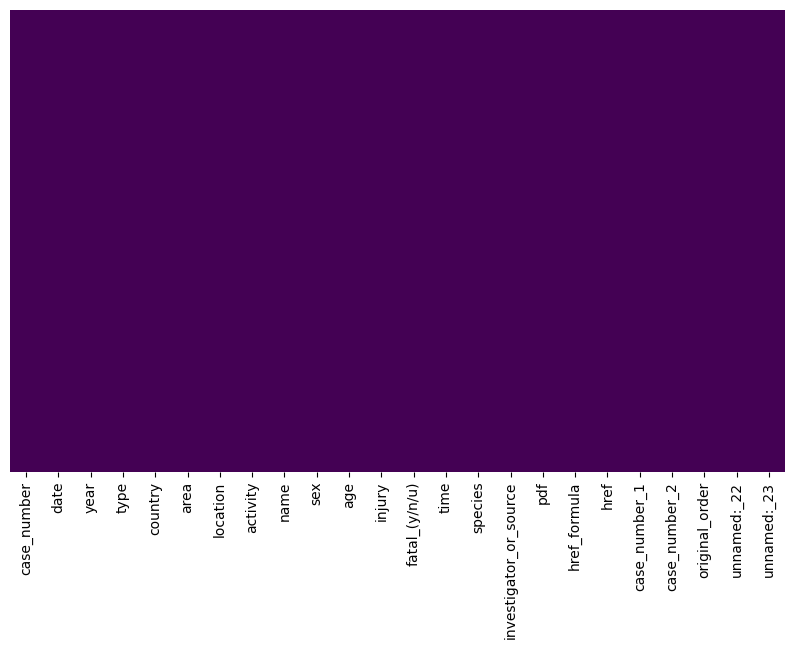

In [251]:
#comprobamos que hemos terminado de limpiar el data de valores nulos 

check_nan(tiburones)

## Valores duplicados o erróneos

In [280]:
#Comprobamos si hay valores duplicados

tiburones.duplicated().sum()

0

In [281]:
#sigamos viendo una muestra para ver qué más encontramos

muestra

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
1893,2001.11.07,07-Nov-2001,2001.0,Invalid,AUSTRALIA,Western Australia,"Leighton Beach, south of North Cottesloe",Surf-skiing,male,M,unknown,"No injury, fell off ski after possibly collidi...",NaN,unknown,unknown,"T. Peake, GSAF",2001.11.07-LeightonBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.07,2001.11.07,4410.0,unknown,unknown
351,2015.10.05.b,05-Oct-2015,2015.0,Unprovoked,USA,Florida,"Pepper Park Beach, St. Lucie County",Body boarding,male,M,22,2 lacerations to ankle,N,13h00,unknown,"WPBF.com, 10/6/2015",2015.10.05.b-FtPierce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.05.b,2015.10.05.b,5952.0,unknown,unknown
1498,2006.02.27,27-Feb-2006,2006.0,Unprovoked,USA,Hawaii,"Makena, Maui",Standing,Nikky Raleigh,F,15,Deep laceration to right calf,N,16h30,5' to 7' shark,"G.T. Kubota, Star Bulletin, 2/28/2006",2006.02.27-Raleigh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.02.27,2006.02.27,4805.0,unknown,unknown
5808,1881.08.16.R,Reported 16-Aug-1881,1881.0,Unprovoked,NaN,Western Banks,NaN,"Floating, holding onto an oar after dory capsized",George Sedgwick,M,20,FATAL,Y,unknown,unknown,"Lewiston Evening Journal, 8/16/1881",1881.08.16.R-Sedgwick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1881.08.16.R,1881.08.16.R,495.0,unknown,unknown
599,2013.11.23.a,23-Nov-2013,2013.0,Unprovoked,AUSTRALIA,Western Australia,Gracetown,Surfing,Chris Boyd,M,35,FATAL,Y,09h00,Thought to involve a white shark,"J. Baily; Perth Now, 11/23/2013",2013.11.23.a-Boyd.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.11.23.a,2013.11.23.a,5704.0,unknown,unknown
3950,1960.11.00.d,Nov-1960,1960.0,Boat,SOUTH AFRICA,Western Cape Province,"5 km from Gordons Bay, False Bay",Hand lining for shad,"7.5 m boat, occupants: 8 men",NaN,unknown,"No injury to occupants, shark bit 45 cm hole i...",N,unknown,White shark (tooth fragments recovered from hu...,"D. Davies; T. Wallett, p.27-30",1960.11.00.d-GordonsBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.11.00.d,1960.11.00.d,2353.0,unknown,unknown
1038,2010.02.15,15-Feb-2010,2010.0,Unprovoked,FIJI,Off Vanua Levu,Nara Reef,Scuba diving,Henry Usimewa,M,19,FATAL,Y,09h30,unknown,"Fiji Times, 2/17/2010",2010.02.15-Usimewa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.02.15,2010.02.15,5265.0,unknown,unknown
3113,1978.09.27,27-Sep-1978,1978.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Miller's Point, False Bay",Spearfishing,Erik Lombard,M,27,"No injury, shark took his catch, then towed & ...",N,16h00,"White shark, 3.7 m [12']","E. Lombard, M. Levine, GSAF",1978.09.27-Lombard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.09.27,1978.09.27,3190.0,unknown,unknown
5938,1864.10.02,02-Oct-1864,1864.0,Sea Disaster,USA,North Carolina,"Cedar Island, Carteret County",Wreck of the Aphrodite,males x 5,M,unknown,FATAL,Y,unknown,unknown,National Republican 10/11/1864,1864.10.02-Aphrodite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.10.02,1864.10.02,365.0,unknown,unknown
4588,1947.01.05,05-Jan-1947,1947.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,Peter C. Knoop,M,18,Flexed left leg lacerated,N,15h50,>1.6 m shark,"P. Knoop, M. Levine, GSAF",1947.01.05-Knoop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfil

In [289]:
#vemos que hay una relación entre case_number, date y year

tiburones[['case_number', 'date', "year"]].head(10)

,case_number,date,year
0,2018.06.25,25-Jun-2018,2018.0
1,2018.06.18,18-Jun-2018,2018.0
2,2018.06.09,09-Jun-2018,2018.0
3,2018.06.08,08-Jun-2018,2018.0
4,2018.06.04,04-Jun-2018,2018.0
5,2018.06.03.b,03-Jun-2018,2018.0
6,2018.06.03.a,03-Jun-2018,2018.0
7,2018.05.27,27-May-2018,2018.0
8,2018.05.26.b,26-May-2018,2018.0
9,2018.05.26.a,26-May-2018,2018.0


In [292]:
#lo primero va a ser pasar los la columna de year a str para que quede sólo el año sin el decimal 0
tiburones["year"] = tiburones["year"].astype(str)


In [306]:
#relacionamos las dos columnas a ver qué se puede hacer

tiburones[['name', 'sex']].head(10)

,name,sex
0,Julie Wolfe,F
1,Adyson McNeely,F
2,John Denges,M
3,male,M
4,Gustavo Ramos,M
5,Chris,M
6,Jose Ernesto da Silva,M
7,male,M
8,Cody High,M
9,male,M


In [305]:
#vamos a ver cómo se podría completar información faltante en una y en otra

unknown_sex = tiburones[tiburones['sex'] == 'unknown']
unknown_sex

#de la observación parece complicado y no se va a poder llenar correctamente la información


,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n/u),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed:_22,unnamed:_23
32,2018.04.09,09-Apr-2018,2018,Unprovoked,NEW CALEDONIA,unknown,"Magenta Beach, Noumea",Windsurfing,unknown,unknown,unknown,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0,unknown,unknown
59,2017.11.25.R,Reported 25-Nov-2017,2017,Sea Disaster,LIBYA,unknown,Gars Garabulli,2 boats capsized,31 migrants,unknown,unknown,FATAL,Y,unknown,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,unknown,unknown
86,2017.09.14,Sep-2017,2017,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,unknown,unknown,unknown,"sharks rammed boats, no injury to occupants",N,unknown,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217.0,unknown,unknown
124,2017.07.02,02-Jul-2017,2017,Invalid,COMOROS,Anjouan,Moya,Fishing,unknown,unknown,unknown,"Skull found in shark, a probable drowning & sc...",U,unknown,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179.0,unknown,unknown
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",unknown,unknown,unknown,unknown,Minor bite to the foot,N,Afternoon,unknown,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,ND-0107,Before 2004,0,Boat,MOZAMBIQUE,Inhambane Province,Off Inhambane,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",unknown,unknown,"No injury to occupants, shark bumped boat",N,unknown,Whale shark,South African Shark Attack File,ND-0107-Inhambane.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0107,ND-0107,91.0,unknown,unknown
6237,ND.0073,"No date, Before 1963",0,Unprovoked,SINGAPORE,unknown,"Keppel Harbor, 2 miles from Singapore city ce...",Swimming,unknown,unknown,unknown,Recovered,N,unknown,unknown,"V.M. Coppleson (1958), p.266",ND-0073-KeppelHarbourSingapore.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0073,ND.0073,66.0,unknown,unknown
6259,ND.0044,1941-1945,0,Sea Disaster,unknown,unknown,unknown,A group of survivors on a raft for 17-days,C.,unknown,unknown,"FATAL, shark leapt into raft and bit the man w...",Y,Late afternoon,1.2 m [4'] shark,"G.A. Llano in Airmen Against the Sea, p.69",ND-0044-C.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0044,ND.0044,44.0,unknown,unknown
6278,ND.0024,Between 1918 & 1939,0,Unprovoked,REUNION,Saint-Denis,Barachois,Swimming,unknown,unknown,unknown,FATAL,Y,unknown,unknown,G. Van Grevelynghe,ND-0024-Barachois-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0024,ND.0024,25.0,unknown,unknown
